In [ ]:
import random
from collections import deque
import time
import matplotlib.pyplot as plt
import numpy as np


class N_Queens:
    # self.size = size of board(self.size*self.size)
    # queen = array 1D, queen[i] = j -> exist queen is placed in (col i, row j)
    # i,j = 0->self.size-1
    def __init__(self, size):
        self.size = size
        self.queen = []

    def is_valid(self):
        n_queens = self.queen
        if len(set(n_queens)) != len(n_queens):
            return False
        n = len(n_queens)
        d1 = [0] * (2 * n - 1)
        d2 = [0] * (2 * n - 1)
        for i in range(n):
            j = n_queens[i]
            if d1[i + j] or d2[i - j + n - 1]:
                return False
            d1[i + j] = d2[i - j + n - 1] = 1
        return True

    def choose_alg(self, alg):
        match alg:
            case "dfs":
                self.queen = self.dfs()
            case "bfs":
                self.queen = self.bfs()
            case "queen_search2":
                self.queen = self.queen_search2()
            case "special":
                self.queen = self.special()
            case _:
                return False
        return True
    def bfs(self):
        def can_place(pos, ocuppied_positions):
            for i in range(len(ocuppied_positions)):
                if ocuppied_positions[i] == pos or \
                        ocuppied_positions[i] - i == pos - len(ocuppied_positions) or \
                        ocuppied_positions[i] + i == pos + len(ocuppied_positions):
                    return False
            return True

        n = self.size
        queue = deque([([], 0)])  # queue of (solution, row)
        while queue:
            solution, row = queue.popleft()
            if row == n:
                return solution
            for col in range(n):
                if can_place(col, solution):
                    queue.append((solution + [col], row + 1))

    def dfs(self):
        def can_place(pos, ocuppied_positions):
            for i in range(len(ocuppied_positions)):
                if ocuppied_positions[i] == pos or \
                        ocuppied_positions[i] - i == pos - len(ocuppied_positions) or \
                        ocuppied_positions[i] + i == pos + len(ocuppied_positions):
                    return False
            return True

        n = self.size

        def place_queens(n, index, ocuppied_positions):
            if index == n:
                return ocuppied_positions
            for i in range(n):
                if can_place(i, ocuppied_positions):
                    ocuppied_positions.append(i)
                    result = place_queens(n, index + 1, ocuppied_positions)
                    if result is not None:
                        return result
                    ocuppied_positions.pop()

        return place_queens(n, 0, [])

    def queen_search2(self):
        n = self.size

        def perform_swap(i, j, queen, dn, dp, collisions):
            N = n
            diff_collision = 0
            dn_idx_affected = set([queen[i] + i, queen[j] + j, queen[i] + j, queen[j] + i])
            dp_idx_affected = set([i - queen[i], j - queen[j], i - queen[j], j - queen[i]])

            for idx in dn_idx_affected:
                if (dn[idx] > 0):
                    diff_collision += dn[idx] - 1
            for idx in dp_idx_affected:
                if (dp[idx + N - 1] > 0):
                    diff_collision += dp[idx + N - 1] - 1

            # update diagonal line
            dn[queen[i] + i] -= 1
            dp[i - queen[i] + N - 1] -= 1
            dn[queen[j] + j] -= 1
            dp[j - queen[j] + N - 1] -= 1

            queen[i], queen[j] = queen[j], queen[i]

            dn[queen[i] + i] += 1
            dp[i - queen[i] + N - 1] += 1
            dn[queen[j] + j] += 1
            dp[j - queen[j] + N - 1] += 1

            for idx in dn_idx_affected:
                if (dn[idx] > 0):
                    diff_collision -= dn[idx] - 1
            for idx in dp_idx_affected:
                if (dp[idx + N - 1] > 0):
                    diff_collision -= dp[idx + N - 1] - 1

            collisions -= diff_collision

            return collisions

        def swap_simu(i, j, queen, dn, dp):
            N = n
            diff_collision = 0
            dn_idx_affected = set([queen[i] + i, queen[j] + j, queen[i] + j, queen[j] + i])
            dp_idx_affected = set([i - queen[i], j - queen[j], i - queen[j], j - queen[i]])

            for idx in dn_idx_affected:
                if (dn[idx] > 0):
                    diff_collision += dn[idx] - 1
            for idx in dp_idx_affected:
                if (dp[idx + N - 1] > 0):
                    diff_collision += dp[idx + N - 1] - 1

            # Swap simulator
            dn[queen[i] + i] -= 1
            dp[i - queen[i] + N - 1] -= 1
            dn[queen[j] + j] -= 1
            dp[j - queen[j] + N - 1] -= 1

            dn[queen[i] + j] += 1
            dp[i - queen[j] + N - 1] += 1
            dn[queen[j] + i] += 1
            dp[j - queen[i] + N - 1] += 1

            for idx in dn_idx_affected:
                if (dn[idx] > 0):
                    diff_collision -= dn[idx] - 1
            for idx in dp_idx_affected:
                if (dp[idx + N - 1] > 0):
                    diff_collision -= dp[idx + N - 1] - 1

            # Re-swap again
            dn[queen[i] + i] += 1
            dp[i - queen[i] + N - 1] += 1
            dn[queen[j] + j] += 1
            dp[j - queen[j] + N - 1] += 1

            dn[queen[i] + j] -= 1
            dp[i - queen[j] + N - 1] -= 1
            dn[queen[j] + i] -= 1
            dp[j - queen[i] + N - 1] -= 1

            if (diff_collision > 0):
                return True
            return False

        def compute_collisions(queen):
            ret = 0
            dn = [0] * (2 * n - 1)
            dp = [0] * (2 * n - 1)
            for i in range(n):
                j = queen[i]
                dn[i + j] += 1
                dp[i - j + n - 1] += 1
            for i in range(2 * n - 1):
                ret += 0 if (dn[i] == 0) else (dn[i] - 1)
                ret += 0 if (dp[i] == 0) else (dp[i] - 1)
            return ret, dn, dp

        def initialize_queens(N):
            r = 1
            queens = []
            for i in range(N):
                queens.append(r)
                r += 2
                if r >= N:
                    r = 0
            return queens

        def compute_attacks(queen, dn, dp):
            attack = []
            for i in range(n):
                j = queen[i]
                if dn[i + j] > 1 or dp[i - j + n - 1] > 1:
                    attack.append(i)
            return attack

        collisions = -1

        while (collisions != 0):
            queen = list(range(n))
            random.shuffle(queen)
            collisions, dn, dp = compute_collisions(queen)
            if collisions == 0:
                return queen
            limit = 0.45 * collisions

            attack = compute_attacks(queen, dn, dp)
            num_of_attack = len(attack)
            loopcount = 0
            while (loopcount <= 32 * n):
                if num_of_attack == 0:
                    return queen
                for k in range(num_of_attack):
                    i = attack[k]
                    j = random.randint(0, n - 1)
                    if swap_simu(i, j, queen, dn, dp):
                        collisions = perform_swap(i, j, queen, dn, dp, collisions)
                    if collisions == 0:
                        return queen
                    if collisions < limit:
                        limit = 0.45 * collisions
                        attack = compute_attacks(queen, dn, dp)
                        num_of_attack = len(attack)
                        break
                loopcount += num_of_attack

    def special(self):
        temp_queen = []
        r = 1
        N = self.size
        for i in range(N):
            temp_queen.append(r)
            r += 2
            if r >= N:
                r = 0
        return temp_queen

    def print_board(self):
        print("Solution:")
        print('')
        n = self.size
        queen = self.queen
        for j in range(n):
            for i in range(n):
                c = ' '
                if queen[i] == j:
                    c = 'Q'
                print("| %s " % c, end='')
            print("|")
        print('')

Enter the size of chessboard: 1

                Enter the algorithms:
                1. DFS
                2. BFS
                3. QUEEN_SEARCH2

                Your option number: 1
Exist valid solution!
Total running time:  0.0010781288146972656
Print the chessboard? (y/n): n


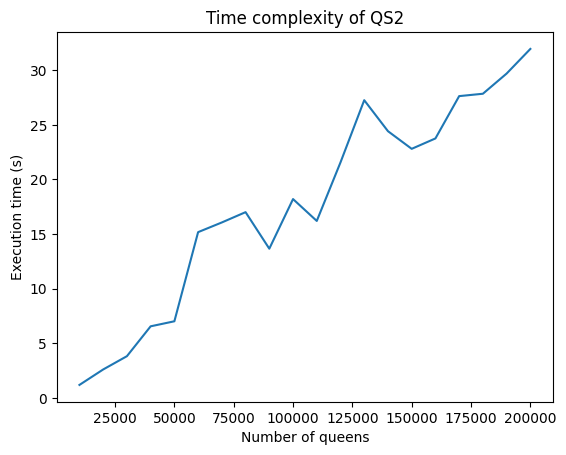

In [ ]:
#QS2
n = []
qs2 = []
for i in range(10000, 205000, 10000):
  queen = N_Queens(i)
  start = time.time()
  queen.choose_alg('queen_search2')
  qs2.append(time.time()- start)
  n.append(i)
plt.plot(n, qs2)
plt.xlabel("Number of queens")
plt.ylabel("Execution time (s)")
plt.title("Time complexity of QS2")
plt.show()

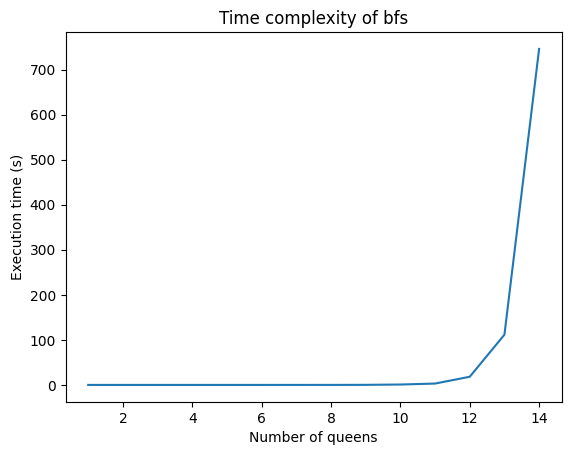

In [ ]:
n = []
bfs = []
for i in range(1, 15, 1):
  queen = N_Queens(i)
  start = time.time()
  queen.choose_alg('bfs')
  bfs.append(time.time()- start)
  n.append(i)
plt.plot(n, bfs)
plt.xlabel("Number of queens")
plt.ylabel("Execution time (s)")
plt.title("Time complexity of bfs")
plt.show()

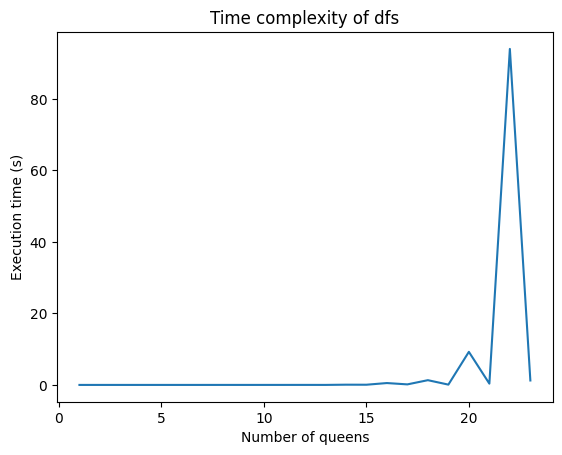

In [ ]:
n = []
dfs = []
for i in range(1, 24, 1):
  queen = N_Queens(i)
  start = time.time()
  queen.choose_alg('dfs')
  dfs.append(time.time()- start)
  n.append(i)
plt.plot(n, dfs)
plt.xlabel("Number of queens")
plt.ylabel("Execution time (s)")
plt.title("Time complexity of dfs")
plt.show()

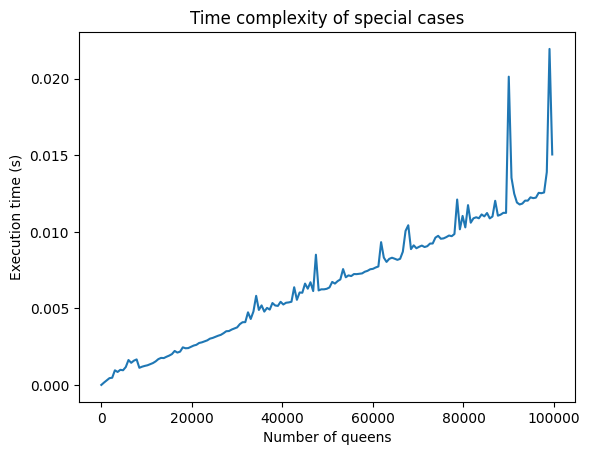

In [ ]:
n = []
special = []
for i in range(6, 100000, 600):
  queen = N_Queens(i)
  start = time.time()
  queen.choose_alg('special')
  special.append(time.time()- start)
  n.append(i)
plt.plot(n, special)
plt.xlabel("Number of queens")
plt.ylabel("Execution time (s)")
plt.title("Time complexity of special cases")
plt.show()